# OpenAI Gym first tests
#### 2022/05/06, AJ Zerouali

Getting OpenAI gym to work on Windows was a nightmare. I'm testing the following environments here:

- CartPole-v1

- LunarLander-v2

The second objective of this notebook is to write a template for recording the rendered environments. This will be useful for visualizing the training of the models and the final policies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [2]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# This is for the interactive version of Matplotlib
# It runs the animations in the notebook.
# To abort the run one clicks on the "power button" in the cell
%matplotlib notebook

In [3]:
from IPython import display

## CartPole-v1 (Classic control)

### Cartpole in Pygame

Executing the cells below will open 

In [6]:
cartpole = gym.make("CartPole-v1")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
s = cartpole.reset()
a = cartpole.action_space.sample()
s_next, r, ep_end, info = cartpole.step(a)

In [14]:
cartpole.render()

error: display Surface quit

In [16]:
env = gym.make('CartPole-v1')
env.reset()

for _ in range(100):
    env.render()
    env.step(env.action_space.sample())
    
env.close()

Will do another rendering test, still with Cartpole environment. Now I want to display the environment in my notebook instead of the Pygame window. After importing IPython.display, we have:

In [4]:
cartpole2 = gym.make('CartPole-v1')
cartpole2.reset()

array([ 0.02906305,  0.00370826, -0.02175577, -0.00732427], dtype=float32)

In [14]:
help(display.display)

Help on function display in module IPython.core.display:

display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)
    Display a Python object in all frontends.
    
    By default all representations will be computed and sent to the frontends.
    Frontends can decide which representation is used and how.
    
    In terminal IPython this will be similar to using :func:`print`, for use in richer
    frontends see Jupyter notebook examples with rich display logic.
    
    Parameters
    ----------
    objs : tuple of objects
        The Python objects to display.
    raw : bool, optional
        Are the objects to be displayed already mimetype-keyed dicts of raw display data,
        or Python objects that need to be formatted before display? [default: False]
    include : list, tuple or set, optional
        A list of format type strings (MIME types) to include in the
        format data dict. If this is set *only* the format types included

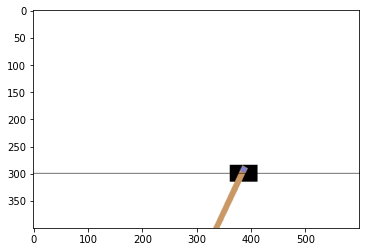

In [5]:
img = plt.imshow(cartpole2.render('rgb_array')) # should be called once only
# The following instructions are for dynamical plotting
# Have to import display from IPython
for _ in range(50):
    img.set_data(cartpole2.render('rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = cartpole2.action_space.sample()
    cartpole2.step(action)
    
cartpole2.close()

This last cell took a long time to execute.

## LunarLander-v2 (Box2D)

In [5]:
lunland = gym.make('LunarLander-v2')
lunland.reset()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.00636978,  1.4085276 , -0.64521784, -0.10635316,  0.0073879 ,
        0.14615145,  0.        ,  0.        ], dtype=float32)

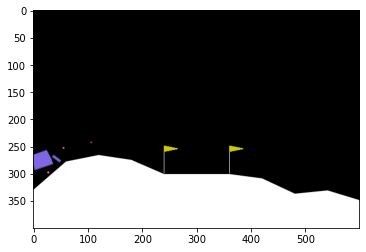

In [11]:
img = plt.imshow(lunland.render('rgb_array')) # should be called once only
# The following instructions are for dynamical plotting
# Have to import display from IPython
for _ in range(50):
    img.set_data(lunland.render('rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = lunland.action_space.sample()
    lunland.step(action)

In [12]:
# Closes Pygame window
lunland.close()

The execution is very slow in Jupyter. Is there a way to fix that??

### Making videos with Matplotlib



What I need to clarify:

1) How to make an animation out of a sequence of images with Matplotlib.

2) Saving the animation to a video, preferably in mp4 format.

**Note (22/05/06 - 20:26):** The mp4 format is not recognized by my current version of Anaconda and the packages that I presently have.

In [3]:
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### Animation from a function

The next cell is the demo from: https://matplotlib.org/stable/gallery/animation/simple_anim.html
It shows how to animate a given function with **animation.FuncAnimation**. For this to work, one has to import matplotlib.animation.animation, and to display the animation in Jupyter, one uses "%matplotlib notebook" instead of "%matplotlib inline".

<IPython.core.display.Javascript object>


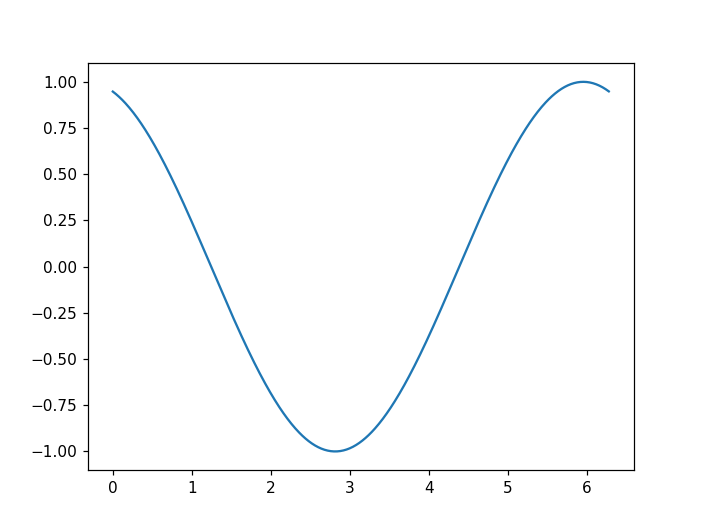

In [9]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
#ani.save("movie.mp4")
#
# or
#
'''
writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)
'''

plt.show()

#### Animation from a list of Matplotlib images

We might be more interested in **animation.ArtistAnimation**, which makes a video out of a list of images.

<IPython.core.display.Javascript object>


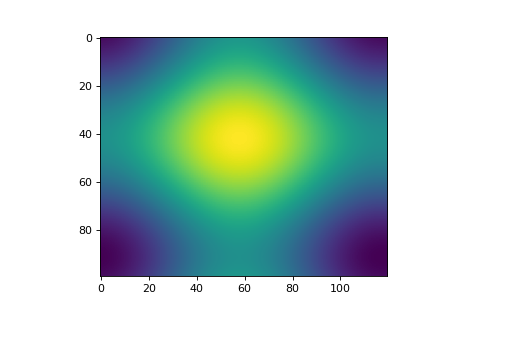

In [26]:
fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

#### Saving to mp4 or gif

By default, Matplotlib uses FFMpegWriter to make the images, and when not available, it calls the Pillow writer, which doesn't support mp4. According to the answer at:
https://stackoverflow.com/questions/60033397/moviewriter-ffmpeg-unavailable-trying-to-use-class-matplotlib-animation-pillo,
I will need to install 2 other packages, ffmpeg and Openh264, and then there's another issue that can arise.

A safer alternative (for now) is to save to gifs, which are supported by pillow.

In [16]:
ani.save("heatmap_animation.gif")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
MovieWriter ffmpeg unavailable; using Pillow instead.


#### Lunar Lander GIF

Let's combine the above.

In [16]:
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
%matplotlib notebook

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


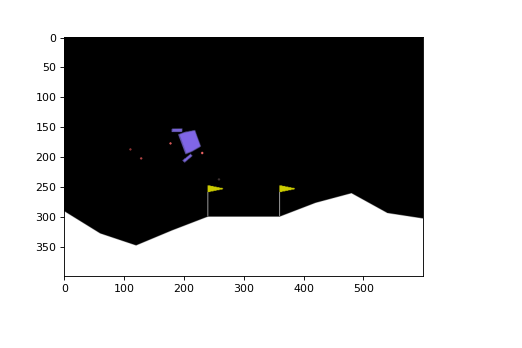

In [32]:
###############
## IMPORTANT ##
###############
# import matplotlib animation

# Make the environment
env = gym.make('LunarLander-v2')
env.reset()

# Doesn't seem relevant
#img = plt.imshow(lunland.render('rgb_array')) # should be called once only

fig, ax = plt.subplots()
#img = ax.imshow(env.render("rgb_array"))
#ims = [img]
ims = []

for _ in range(300):
    
    # Take next action randomly
    action = env.action_space.sample()
    env.step(action)
    
    # Build the image and append to list
    img= ax.imshow(env.render('rgb_array'), animated = True)
    ims.append([img])


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
env.close()
plt.show()


In [33]:
ani.save("lunar_ani_test.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
